In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
PATH = "./courses/fastai/courses/dl1/data/xray/"
sz=224
arch = dn121
bs = 32

In [3]:
m = arch(True)
m

Sequential(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu0): ReLU(inplace)
  (pool0): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu1): ReLU(inplace)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
      (relu2): ReLU(inplace)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True)
      (relu1): ReLU(inplace)
      (conv1): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, af

In [4]:
os.listdir(PATH)

['test', 'valid', 'train']

In [5]:
os.listdir(f'{PATH}valid')

['pleural_thickening',
 'mass',
 'edema',
 'pneumonia',
 'atelectasis',
 'pneumothorax',
 'consolidation',
 'fibrosis',
 'cardiomegaly',
 'emphysema',
 'infiltration',
 'nodule',
 'hernia',
 'effusion']

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
files = os.listdir(f'{PATH}valid/effusion')[:5]
files

['00025527_009.png',
 '00018237_009.png',
 '00014719_008.png',
 '00016141_001.png',
 '00007188_006.png']

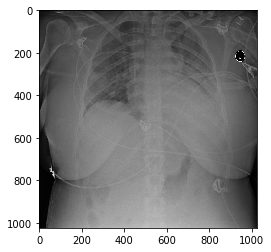

In [8]:
img = plt.imread(f'{PATH}valid/effusion/{files[1]}')
plt.imshow(img);

In [9]:
img.shape

(1024, 1024, 3)

In [10]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [11]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 10)

100%|██████████| 45/45 [00:50<00:00,  1.13s/it]


epoch      trn_loss   val_loss   accuracy                   
    0      1.748367   2.012468   0.357639  
    1      1.567034   1.994443   0.363889                   
    2      1.47612    1.995917   0.362847                   
    3      1.352698   2.004064   0.369444                   
    4      1.25347    2.014942   0.372222                   
    5      1.188354   2.01291    0.375                      
    6      1.12659    2.023681   0.370486                   
    7      1.096233   2.035407   0.375694                   
    8      1.005745   2.058717   0.376736                    
    9      0.979631   2.075367   0.372917                    



[array([2.07537]), 0.3729166666666667]

In [12]:
data.classes

['atelectasis',
 'cardiomegaly',
 'consolidation',
 'edema',
 'effusion',
 'emphysema',
 'fibrosis',
 'hernia',
 'infiltration',
 'mass',
 'nodule',
 'pleural_thickening',
 'pneumonia',
 'pneumothorax']

In [13]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [14]:
accuracy_np(probs, y)

0.3729166666666667

In [15]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[269  15   9   7  70  11   1   0 181  10  10   0   0   2]
 [ 33  24   0   2  13   3   0   0  73   4  15   0   0   1]
 [ 38   4   2   3  23   3   2   1  49   4   9   1   0   0]
 [ 22   1   3   6  12   0   0   0  25   1   2   0   0   0]
 [ 83   6  12   5  99   2   3   0  74   4   6   2   0   3]
 [ 19   2   0   1   4   6   2   0  20   2  11   2   0   1]
 [ 18   1   1   0   9   1   3   0  57   1   9   1   0   2]
 [  2   1   0   0   0   1   0   0   5   0   0   0   0   0]
 [118  20  15   5  38   7   8   0 615   7  34   3   0   5]
 [ 37   2   1   0  20   3   1   0  73  19  13   0   0   1]
 [ 25  10   0   2  10   3   3   1 106   7  22   0   0   3]
 [ 19   3   4   2  16   4   1   0  38   3  10   4   0   2]
 [  3   2   0   0   1   0   0   0  14   0   1   0   0   0]
 [ 24   0   1   0   3   3   0   0  31   0   4   0   0   5]]


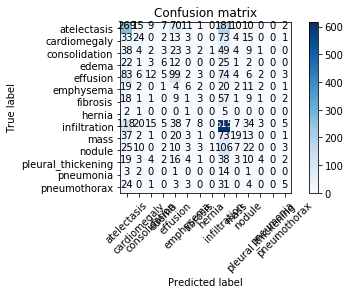

In [17]:
plot_confusion_matrix(cm, data.classes)

### Choosing a Learning Rate

In [18]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [19]:
learn.sched.plot_lr()

AttributeError: 'NoneType' object has no attribute 'plot_lr'

In [20]:
learn.sched.plot()

AttributeError: 'NoneType' object has no attribute 'plot'

### Improving our Model

In [21]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [22]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [23]:
ims = np.stack([get_augs() for i in range(6)])

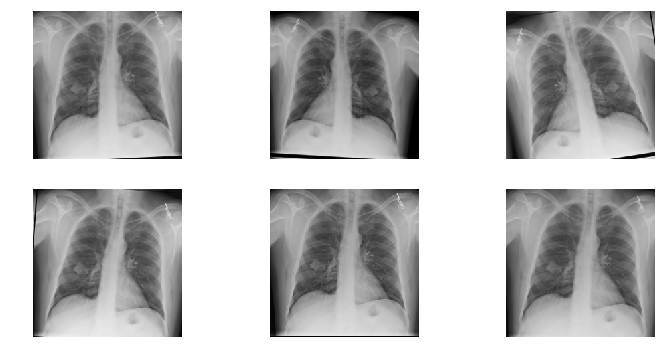

In [24]:
plots(ims, rows=2)

In [25]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.730034   2.0149     0.345486  



[array([2.0149]), 0.3454861111111111]

In [27]:
learn.precompute=False

In [28]:
learn.fit(1e-2, 3, cycle_len=1)

    1      1.768349   1.987685   0.361806                   
    2      1.74248    1.962677   0.373611                   



[array([1.96268]), 0.3736111111111111]

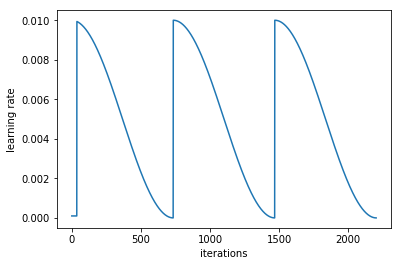

In [29]:
learn.sched.plot_lr()

### Fine Tuning and differential Learning Rate

In [30]:
learn.unfreeze()

In [31]:
lr=np.array([1e-4,1e-3,1e-2])

In [32]:
learn.fit(lr, 1, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.621294   1.870336   0.39375   



[array([1.87034]), 0.39375]

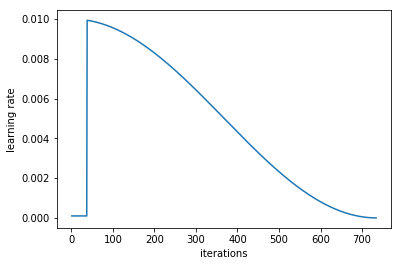

In [33]:
learn.sched.plot_lr()

In [34]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [35]:
accuracy_np(probs, y)

0.3975694444444444

In [36]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[233  29   0   7 107  20   1   0 140  22  23   2   0   1]
 [ 19  82   0   2  12   0   0   2  42   3   5   1   0   0]
 [ 43   7   3   4  21   5   5   0  40   3   6   0   1   1]
 [ 17   2   3  18  15   1   0   0  11   1   4   0   0   0]
 [ 64   8   3   6 132   9   2   1  51   9  13   0   0   1]
 [ 12   1   0   2   7  19   2   0  16   5   5   0   0   1]
 [  7   4   1   2   8   6   8   1  41   4  20   0   0   1]
 [  3   3   0   0   0   0   0   0   3   0   0   0   0   0]
 [ 88  47   3  15  51  11   4   1 575  22  51   1   1   5]
 [ 27   6   0   2  24   5   1   0  43  32  30   0   0   0]
 [ 18  15   0   3  11   7   3   0  78  15  41   0   0   1]
 [ 16   7   0   2  20   7   2   1  34   4  10   0   0   3]
 [  1   1   1   0   1   1   0   0  12   2   2   0   0   0]
 [ 16   1   1   0   7   7   3   1  26   3   4   0   0   2]]


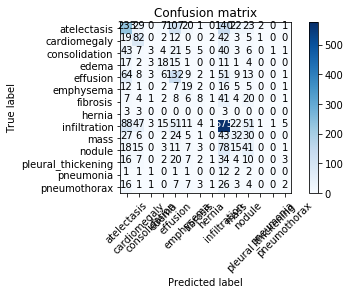

In [38]:
plot_confusion_matrix(cm, data.classes)